In [ ]:
import torch

In [2]:
from torch.autograd import Variable

In [3]:
x_data = Variable(torch.tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.tensor([[2.0], [4.0], [6.0]]))

In [4]:
x_data.data

tensor([[1.],
        [2.],
        [3.]])

In [20]:
class Model(torch.nn.Module):
    """
    in the constructor we will initialize two nn.Linear model
    """
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1)
            
    def forward(self, x):
        """ In forward we are accepting a Variable as input and we must return a Variable as an  output.
        We can use module defined in constructor(i.e we are using self.linear) or any arbitrary operation(e.g. 
        we could have used something like x*2)
        """
        y_pred = self.linear(x)
        
        return y_pred

In [21]:
# Model.parameters
model = Model()

In [22]:
""" Construct our loss function and the optimizer(using predefined ones from PyTorch API)
    We are calling Model.parameters() inside SGD as it contains the trainable parameter of nn.Linear Module
"""

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training Loop
for epoch in range(100):
    # Forward pass: Computed by passing x to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    if epoch % 10 == 0:
        print("epoch finished is %d and loss is %.5f" % (epoch, loss.data))
    
    # set the gradients to zero to prevent accumaltion epoch wise, call backward and update parameters accordingly
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    

epoch finished is 0 and loss is 58.74826
epoch finished is 10 and loss is 0.09115
epoch finished is 20 and loss is 0.06336
epoch finished is 30 and loss is 0.05481
epoch finished is 40 and loss is 0.04743
epoch finished is 50 and loss is 0.04104
epoch finished is 60 and loss is 0.03551
epoch finished is 70 and loss is 0.03072
epoch finished is 80 and loss is 0.02658
epoch finished is 90 and loss is 0.02300


In [12]:
# using the model for prediction
test = Variable(torch.tensor([[4.0]]))
print("prediction for test", 4, model.forward(test))

prediction for test 4 tensor([[7.9905]], grad_fn=<ThAddmmBackward>)


In [9]:
from graphviz import Digraph
from torchviz import make_dot

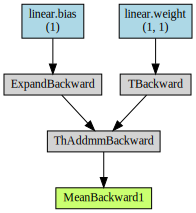

In [10]:
# visualizing your dynamic computational graph
l = model(x_data)
make_dot(l.mean(), params=dict(model.named_parameters()))